In [1]:
import numpy as np
import pandas_profiling as pp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('dataset.xlsx')

In [3]:
#data.head()
#Effectuons une copie de nos données
df = data.copy()
#Déterminons le nombre de lignes et le nombre de colonnes
df.shape

(5644, 111)

In [4]:
#Déterminons et dénombrons les types de variables présent dans le dataset
df.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

<AxesSubplot:>

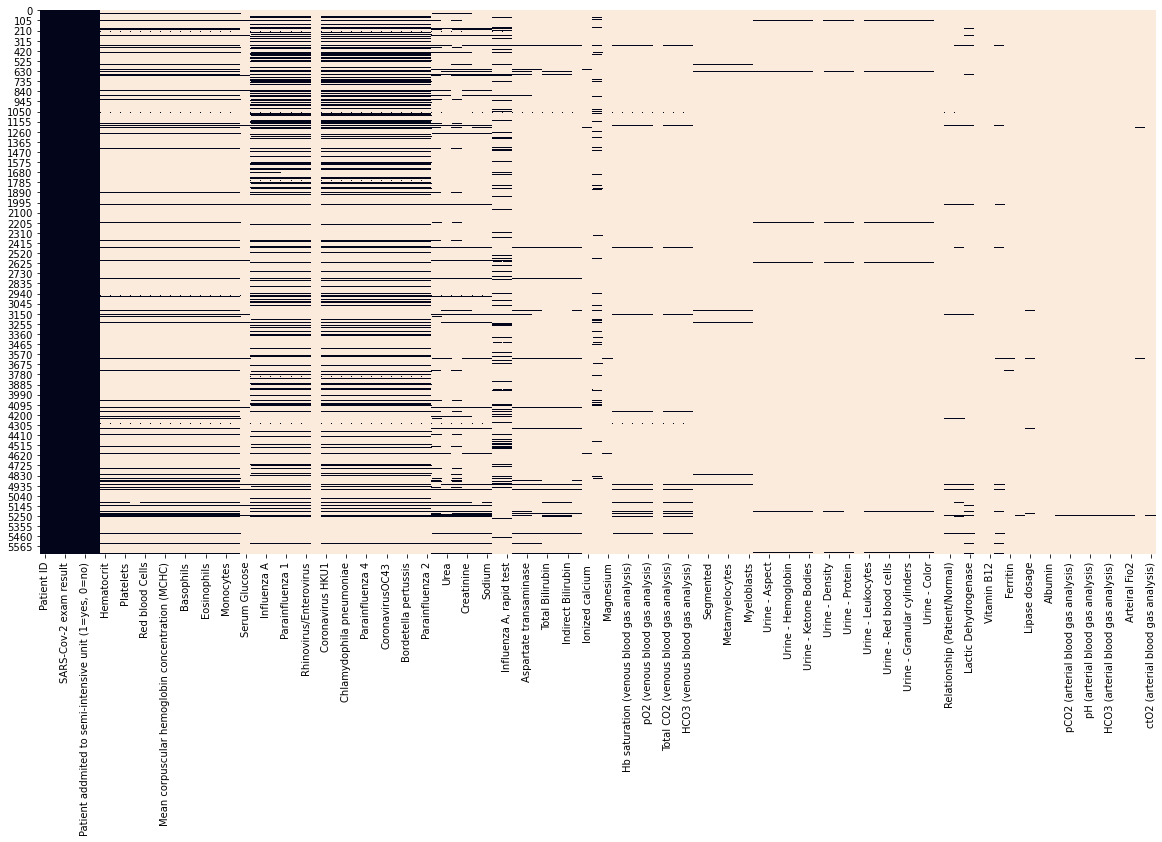

In [5]:
#Visualisons toutes nos données dans une image
plt.figure(figsize = (20,10))
sns.heatmap(df.isna(),cbar=False)

In [6]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient ID                                               0.0
Patient age quantile                                     0.0
SARS-Cov-2 exam result                                   0.0
Patient addmited to regular ward (1=yes, 0=no)           0.0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.0
                                                        ... 
Partial thromboplastin time (PTT)                        1.0
Urine - Sugar                                            1.0
Mycoplasma pneumoniae                                    1.0
D-Dimer                                                  1.0
Prothrombin time (PT), Activity                          1.0
Length: 111, dtype: float64

Text(0, 0.5, 'Nombre de colonnes')

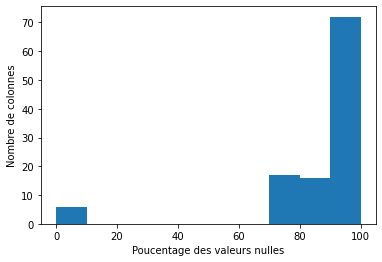

In [4]:
#Affichons le pourcentage des colonnes nulles
df_null_pct = df.isna().mean().round(4) * 100
plt.figure()
plt.hist(df_null_pct)
#plt.title("Volume d'eau contenu par une éprouvette graduée pour 50mL mesuré")
plt.xlabel("Poucentage des valeurs nulles")
plt.ylabel("Nombre de colonnes")
#df.isna().mean().round(4) * 100

<AxesSubplot:>

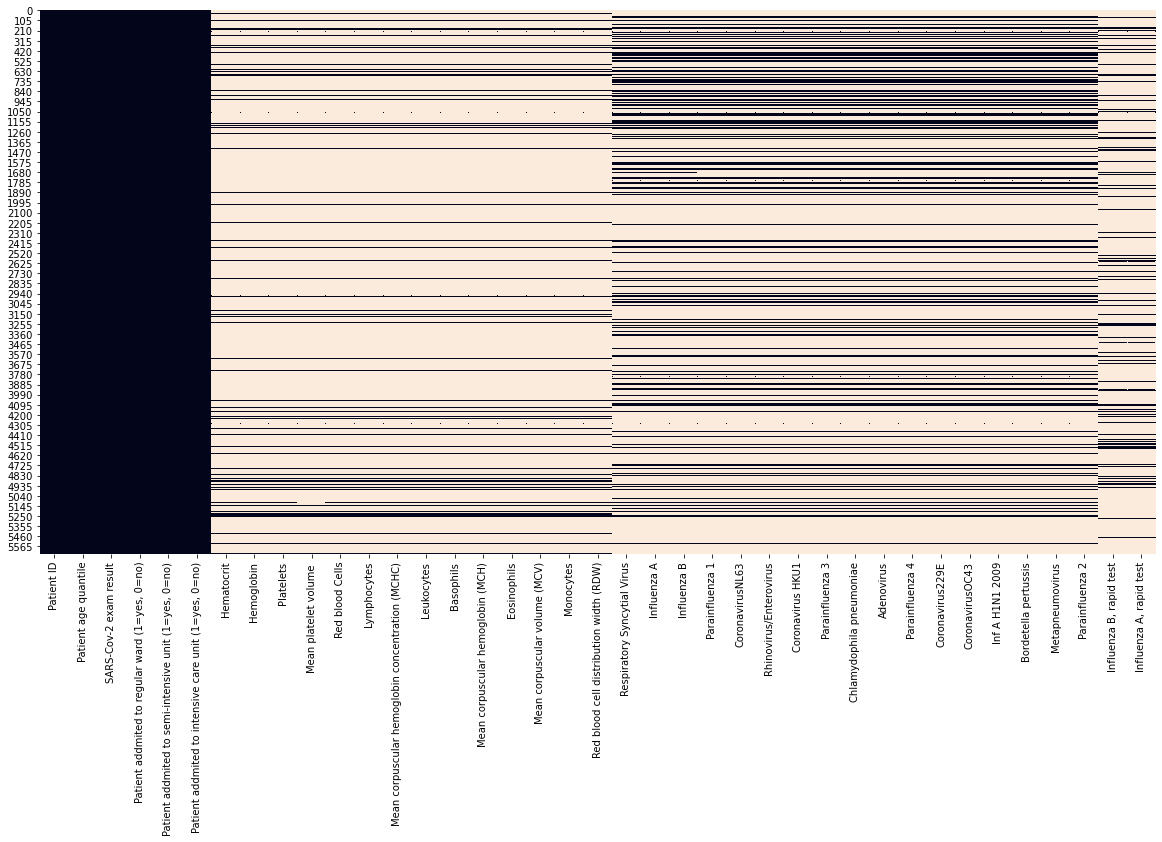

In [8]:
#Elimininons les colonnes qui ont plus de 90% de données manquantes >
#df.columns[df.isna().sum()/df.shape[0]<0.9] les colonnes qui ont moins de 90% de données manquantes
df = df[df.columns[df.isna().sum()/df.shape[0]<0.9]]
#Visualisons toutes nos données dans une image
plt.figure(figsize = (20,10))
sns.heatmap(df.isna(),cbar=False)

In [9]:
#Eliminons la colonne patient ID
df = df.drop('Patient ID', axis=1)

In [10]:
#Visualisons la target
df['SARS-Cov-2 exam result'].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

<AxesSubplot:xlabel='SARS-Cov-2 exam result', ylabel='Count'>

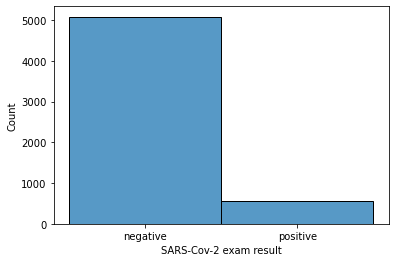

In [11]:
sns.histplot(df['SARS-Cov-2 exam result'])

In [12]:
# Selectionnons toutes les colonnes de type float
for col in  df.select_dtypes(include = ['float']):
    print(col)


Hematocrit
Hemoglobin
Platelets
Mean platelet volume 
Red blood Cells
Lymphocytes
Mean corpuscular hemoglobin concentration (MCHC)
Leukocytes
Basophils
Mean corpuscular hemoglobin (MCH)
Eosinophils
Mean corpuscular volume (MCV)
Monocytes
Red blood cell distribution width (RDW)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

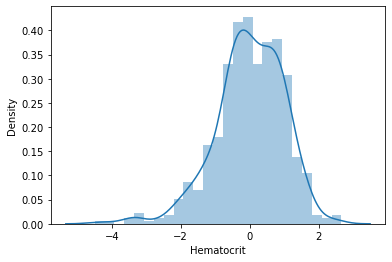

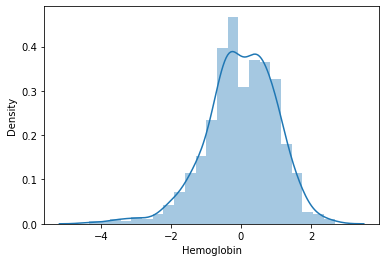

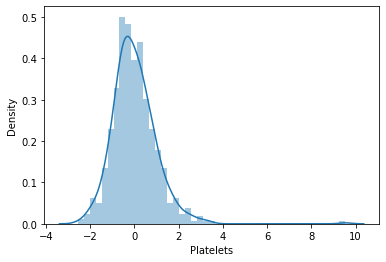

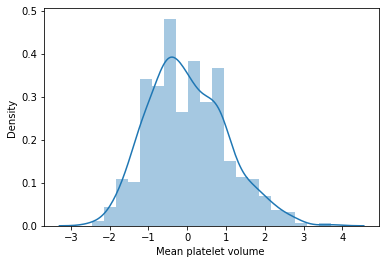

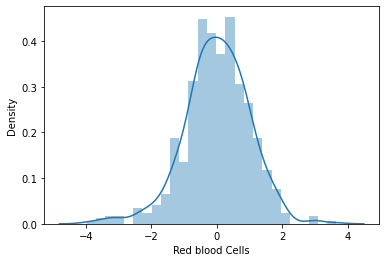

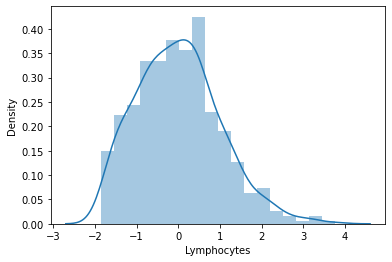

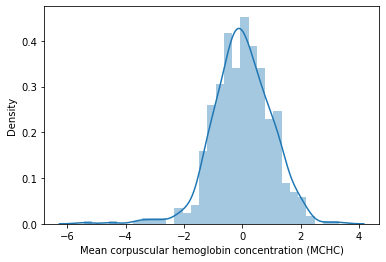

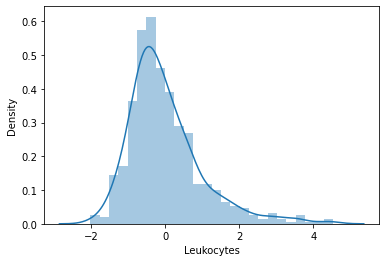

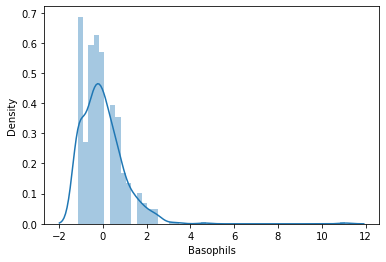

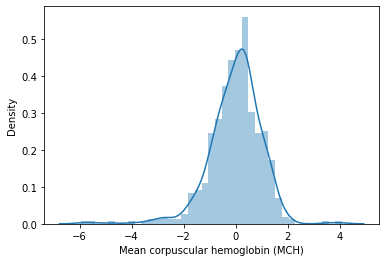

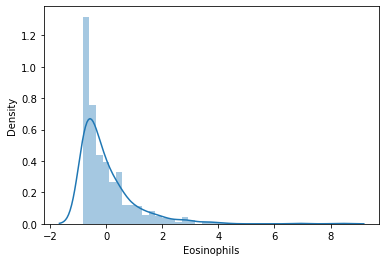

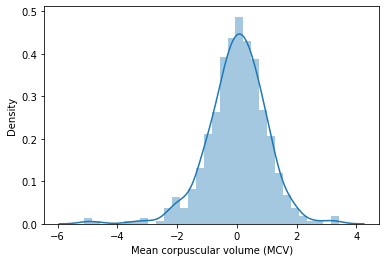

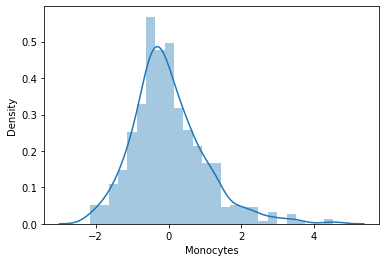

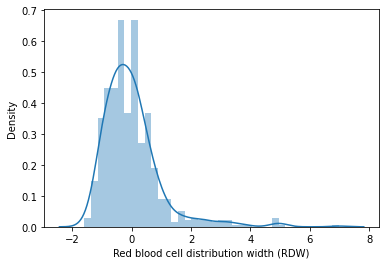

In [13]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Patient age quantile', ylabel='Density'>

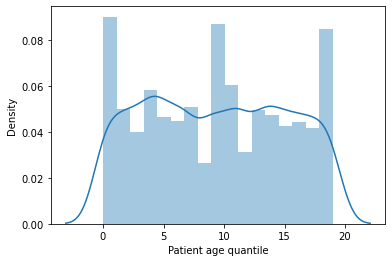

In [25]:
#Histogramme de la variable -Patient age quantile-
sns.distplot(df['Patient age quantile'])

In [33]:
#Analysons les catégories des variables qualitatives(Object)
for col in df.select_dtypes('object'):
    print(col, df[col].unique())

SARS-Cov-2 exam result ['negative' 'positive']
Respiratory Syncytial Virus [nan 'not_detected' 'detected']
Influenza A [nan 'not_detected' 'detected']
Influenza B [nan 'not_detected' 'detected']
Parainfluenza 1 [nan 'not_detected' 'detected']
CoronavirusNL63 [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus [nan 'detected' 'not_detected']
Coronavirus HKU1 [nan 'not_detected' 'detected']
Parainfluenza 3 [nan 'not_detected' 'detected']
Chlamydophila pneumoniae [nan 'not_detected' 'detected']
Adenovirus [nan 'not_detected' 'detected']
Parainfluenza 4 [nan 'not_detected' 'detected']
Coronavirus229E [nan 'not_detected' 'detected']
CoronavirusOC43 [nan 'not_detected' 'detected']
Inf A H1N1 2009 [nan 'not_detected' 'detected']
Bordetella pertussis [nan 'not_detected' 'detected']
Metapneumovirus [nan 'not_detected' 'detected']
Parainfluenza 2 [nan 'not_detected']
Influenza B, rapid test [nan 'negative' 'positive']
Influenza A, rapid test [nan 'negative' 'positive']


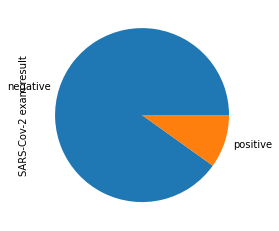

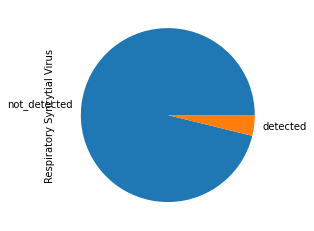

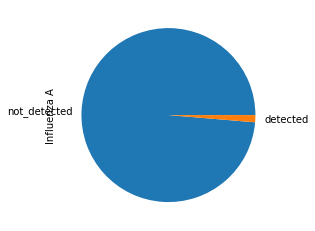

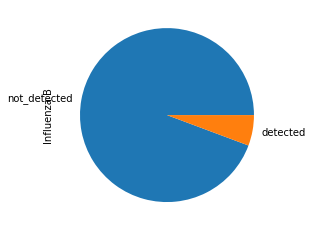

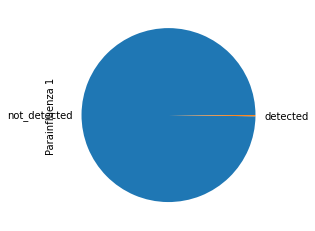

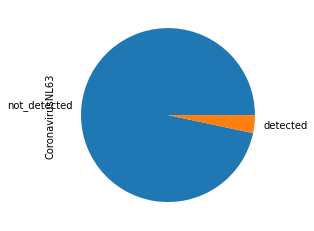

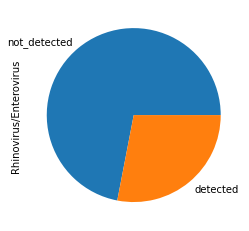

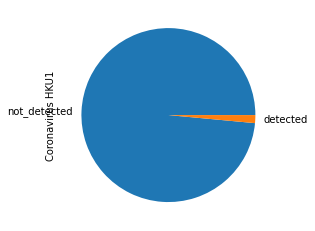

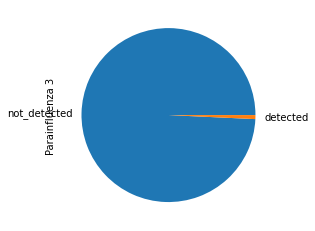

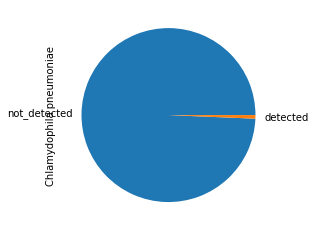

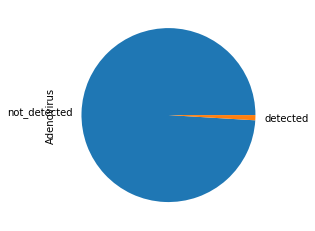

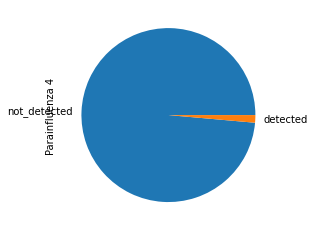

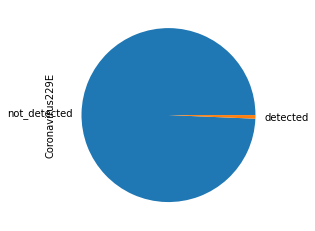

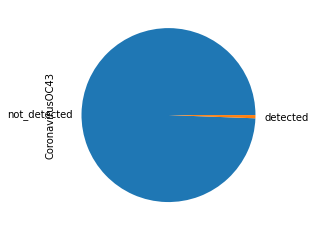

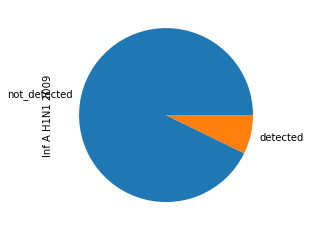

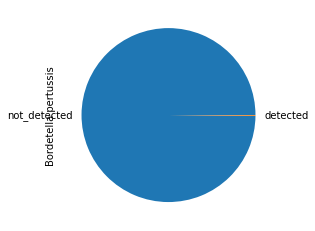

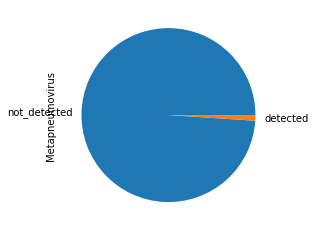

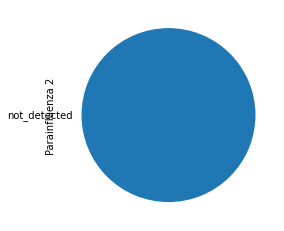

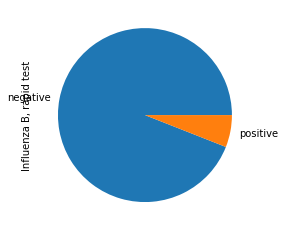

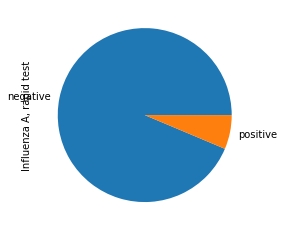

In [38]:
#Analysons les catégories des variables qualitatives(Object)
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

In [35]:
#Créons des sous-ensembles positif et négatif
positive_df=df[df['SARS-Cov-2 exam result']=='positive']

In [40]:
#Créons des sous-ensembles positif et négatif
negative_df=df[df['SARS-Cov-2 exam result']=='negative']

In [41]:
# Création des ensembles Blood and  Viral
missing_rate = df.isna().sum()/df.shape[0]

In [44]:
blood_columns =df.columns[(missing_rate<0.9)& (missing_rate>0.88)]

In [43]:
viral_columns =df.columns[(missing_rate<0.88)& (missing_rate>0.75)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

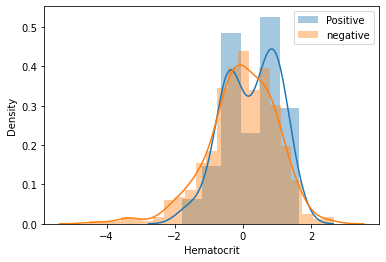

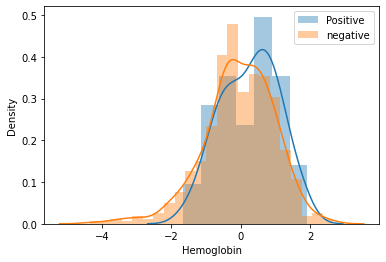

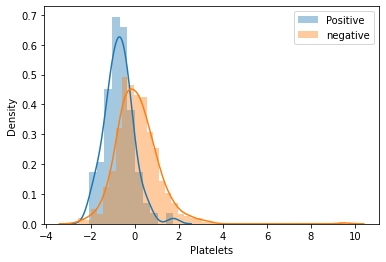

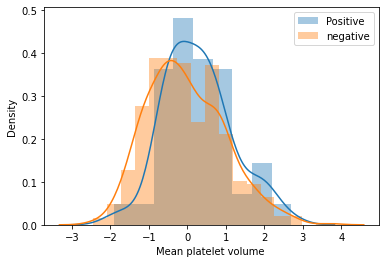

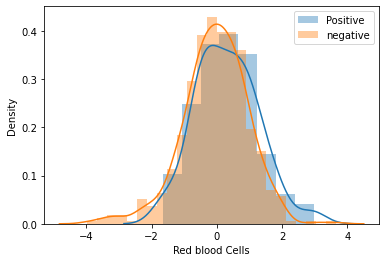

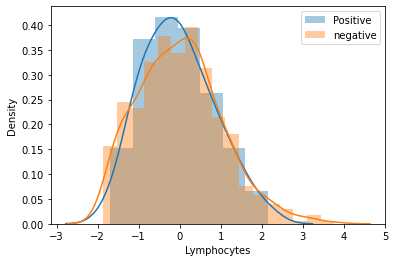

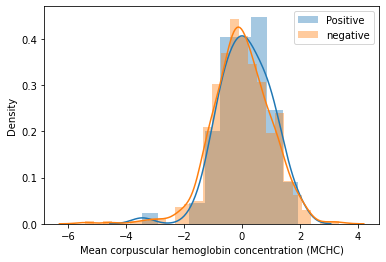

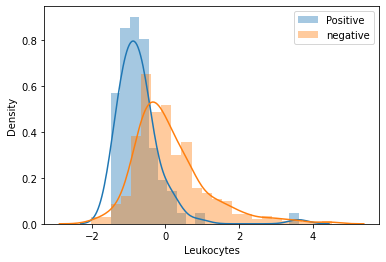

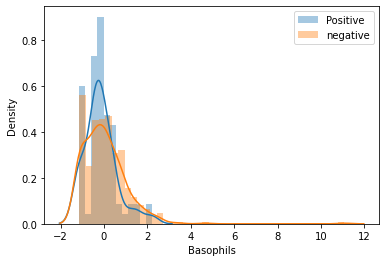

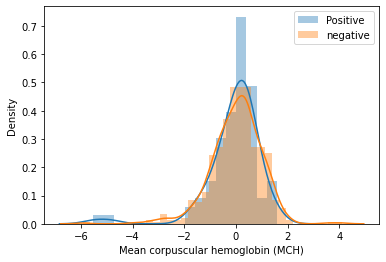

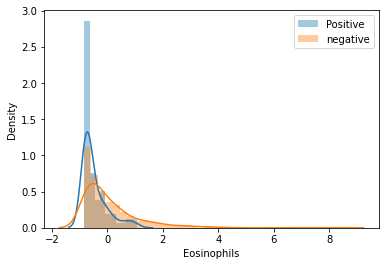

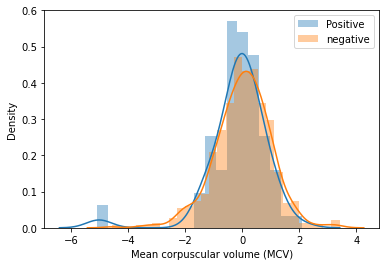

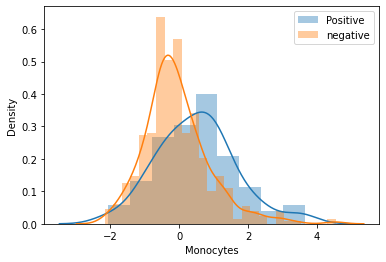

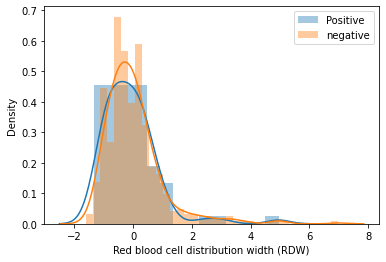

In [47]:
#Visialisons la relation Target/Blood
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col], label='Positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

### Relation Target/Age quantile

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

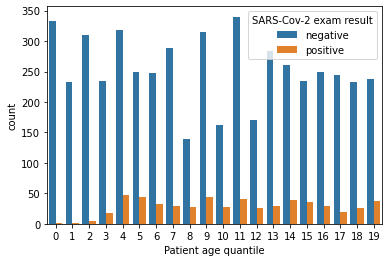

In [48]:
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data = df)

### Relation Target/ Variables qualitatives

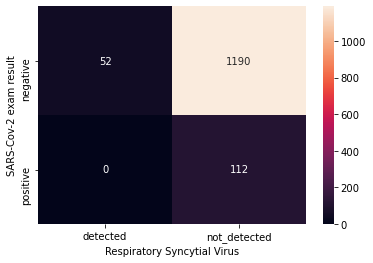

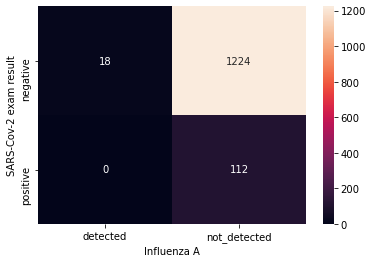

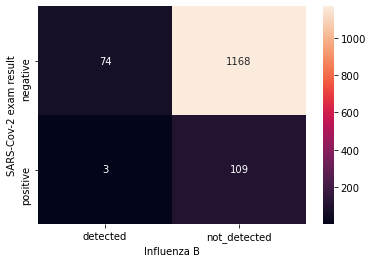

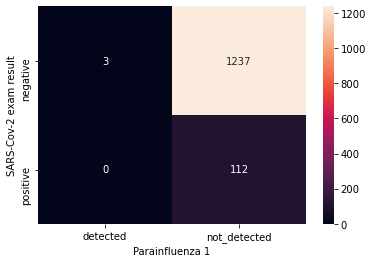

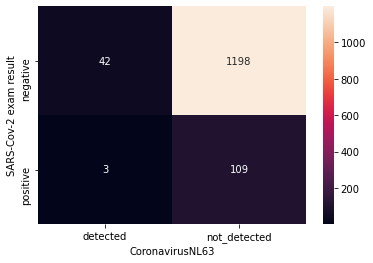

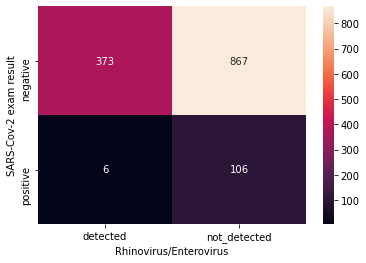

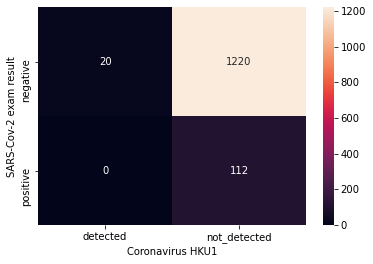

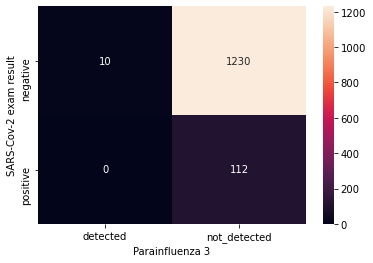

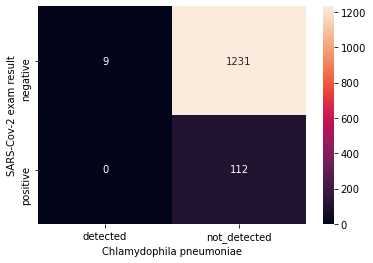

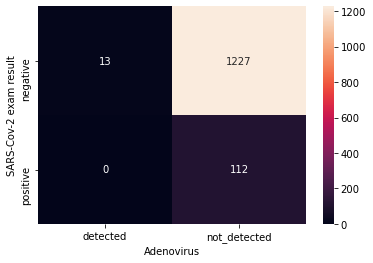

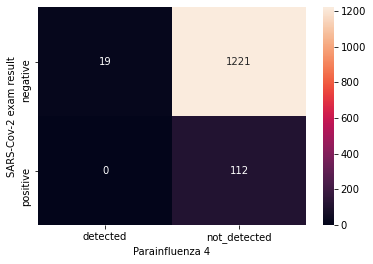

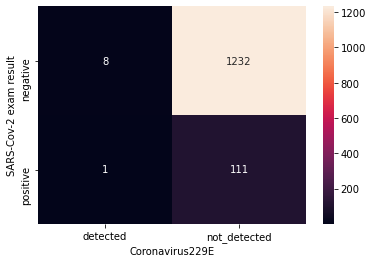

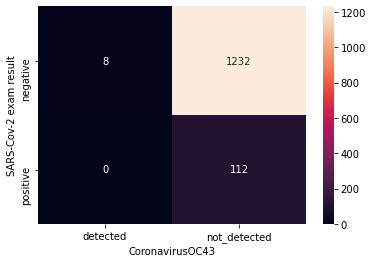

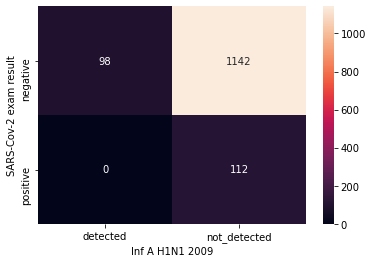

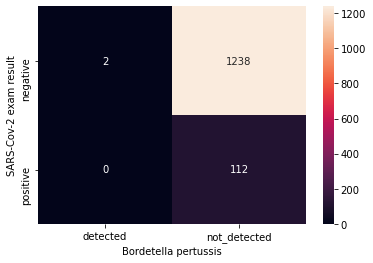

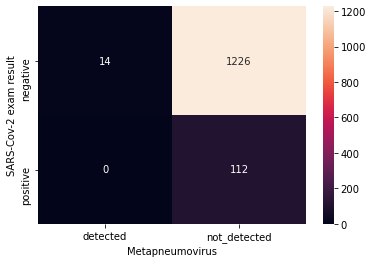

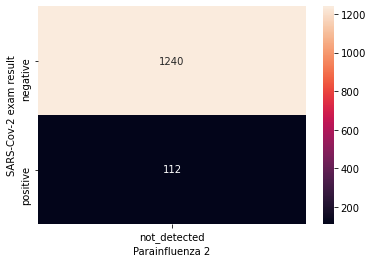

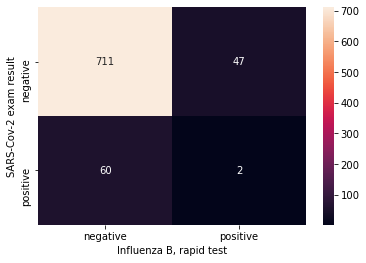

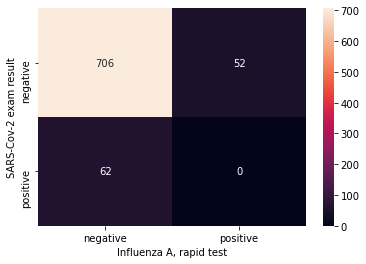

In [49]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'],df[col]),annot=True, fmt='d')

In [ ]:
df_num = df.select_dtypes(include = ['float64'])
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/51 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
### PRE-TRAITEMENT

In [5]:
data = pd.read_excel('dataset.xlsx')
dataset=data.copy()

In [6]:
missing_rate=dataset.isna().sum()/dataset.shape[0]

In [7]:
missing_rate

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
                                                           ...   
HCO3 (arterial blood gas analysis)                       0.995216
pO2 (arterial blood gas analysis)                        0.995216
Arteiral Fio2                                            0.996456
Phosphor                                                 0.996456
ctO2 (arterial blood gas analysis)                       0.995216
Length: 111, dtype: float64

In [8]:
blood_columns = list(dataset.columns[(missing_rate<0.9)&(missing_rate>0.88)]) 
viral_columns = list(dataset.columns[(missing_rate<0.80)&(missing_rate>0.75)]) 

In [9]:
key_columns = ['Patient age quantile','SARS-Cov-2 exam result']

In [10]:
dataset = dataset[key_columns + blood_columns + viral_columns]
dataset.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


In [11]:
### TrainTest - Nettoyage - Encodage ###

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
trainset,testset=train_test_split(dataset, test_size=0.2, random_state=0)

In [14]:
trainset['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [15]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

In [16]:
### Encodage ###

In [17]:
code = {'positive':1,
        'negative':0,
        'detected':1,
        'not_detected':0}

In [18]:
for col in dataset.select_dtypes('object'):
    dataset[col]=dataset[col].map(code)

In [19]:
def encodage(df):
    code = {'positive':1,
        'negative':0,
        'detected':1,
        'not_detected':0}
    
    for col in df.select_dtypes('object'):
        df.loc[:,col]=df[col].map(code)
    
    return df
    

In [20]:
def feature_engineering(df):
    df['teste positif'] = df[viral_columns].sum(axis=1)>=1
    df = df.drop(viral_columns, axis=1)
    return df

In [21]:
def imputation(df):
    return df.dropna(axis=0)

In [22]:
def preprocessing(df):
    df=encodage(df)
    df = feature_engineering(df)
    df=imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result',axis=1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return X,y

In [23]:
X_train, y_train = preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-20-79abb0255eac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['teste positif'] = df[viral_columns].sum(axis=1)>=1


In [24]:
X_test, y_test = preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-20-79abb0255eac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['teste positif'] = df[viral_columns].sum(axis=1)>=1


In [25]:
### Modélisation ###

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [27]:
model_1 = RandomForestClassifier(random_state=0)

In [28]:
model_2 = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif, k=10),
                      RandomForestClassifier(random_state=0))

In [29]:
### Procédure d'évaluation ###

In [30]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [59]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[92  3]
 [13  3]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        95
           1       0.50      0.19      0.27        16

    accuracy                           0.86       111
   macro avg       0.69      0.58      0.60       111
weighted avg       0.82      0.86      0.83       111



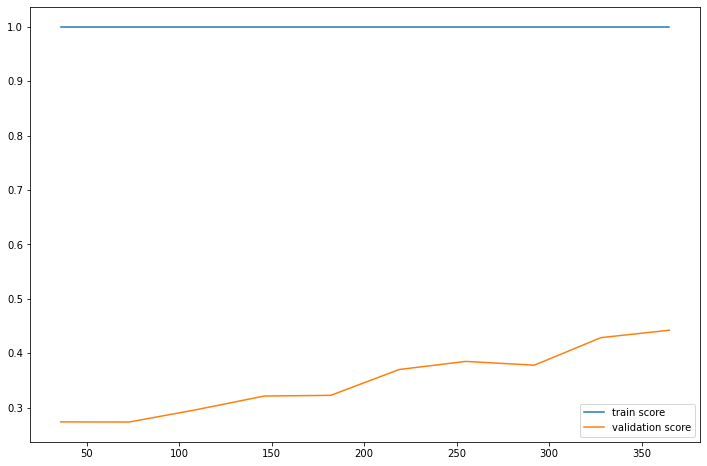

In [32]:
evaluation(model_1)

In [33]:
# Visualisation des données
#plt.figure(num=None, figsize=(8, 6))
#plt.scatter(x[:,0], x[:, 1], marker = 'o', c=y, edgecolors='k')
#plt.xlabel('X0')
#plt.ylabel('X1')
#x.shape

<AxesSubplot:>

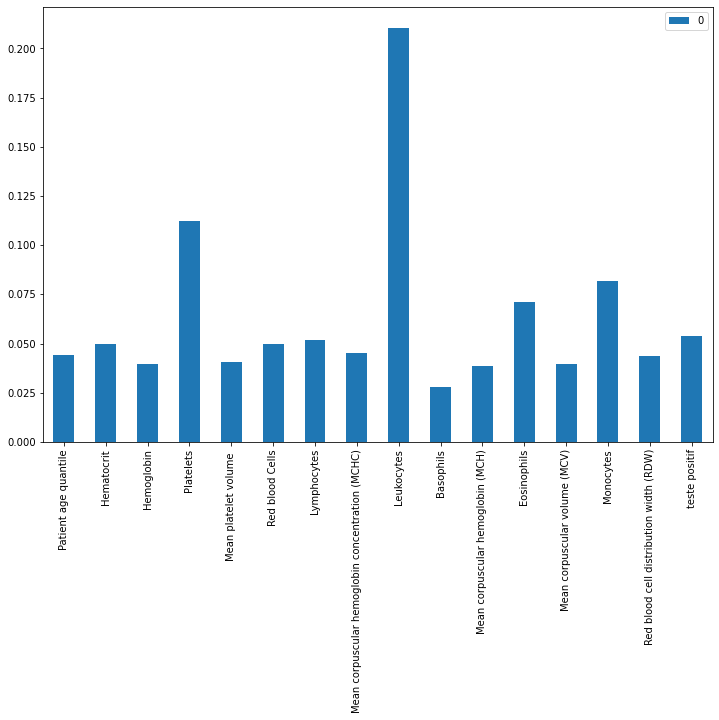

In [34]:
pd.DataFrame(model_1.feature_importances_,index=X_train.columns).plot.bar(figsize=(12,8))

In [35]:
#### MODELISATION

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve

In [37]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [38]:
# creating a pipeline for all the models
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNeighbors = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())
LogisticRegression = make_pipeline(preprocessor, LogisticRegression(random_state=0))
NaiveBaive= make_pipeline(preprocessor,StandardScaler(), GaussianNB())

In [39]:
dict_models = {
    'RandomForest':RandomForest,
    'SVecteurMachine':SVM,
    'KNeighbors':KNeighbors,
    'LogisticRegression':LogisticRegression,
    'NaiveBaive':NaiveBaive
}

In [40]:
#The function to create a model with accuracy score and confusion matrix;
#model: Takes different model alogirthm as an input for the operation.
 
def MODEL(model,name):
        
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('The accuracy score of the model is: {}%'.format(accuracy_score(y_test, y_pred)))
    print('-'*50)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    #ns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    plot_roc_curve(model,X_test,y_test)
    
    N,train_score,val_score = learning_curve(model, X_train, y_train,cv=4, scoring='f1',train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.title(name)
    plt.legend()

--------------------------------------------------
RandomForest
The accuracy score of the model is: 0.8648648648648649%
--------------------------------------------------
[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111

--------------------------------------------------
SVecteurMachine
The accuracy score of the model is: 0.8828828828828829%
--------------------------------------------------
[[92  3]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        95
           1       0.67      0.38      0.48        16

    accuracy                           0.88       111
   macro avg       0.78      0.67      0.71       111
weighted avg      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

--------------------------------------------------
NaiveBaive
The accuracy score of the model is: 0.46846846846846846%
--------------------------------------------------
[[37 58]
 [ 1 15]]
              precision    recall  f1-score   support

           0       0.97      0.39      0.56        95
           1       0.21      0.94      0.34        16

    accuracy                           0.47       111
   macro avg       0.59      0.66      0.45       111
weighted avg       0.86      0.47      0.52       111



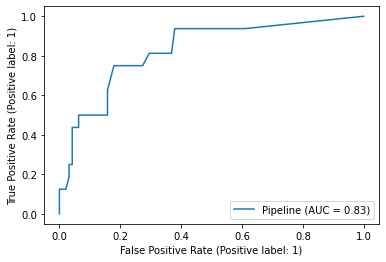

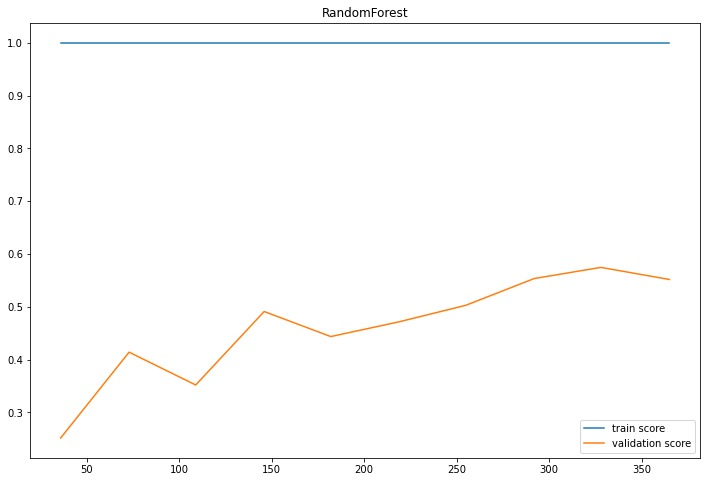

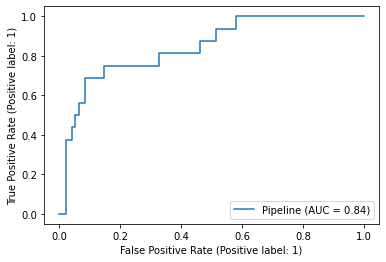

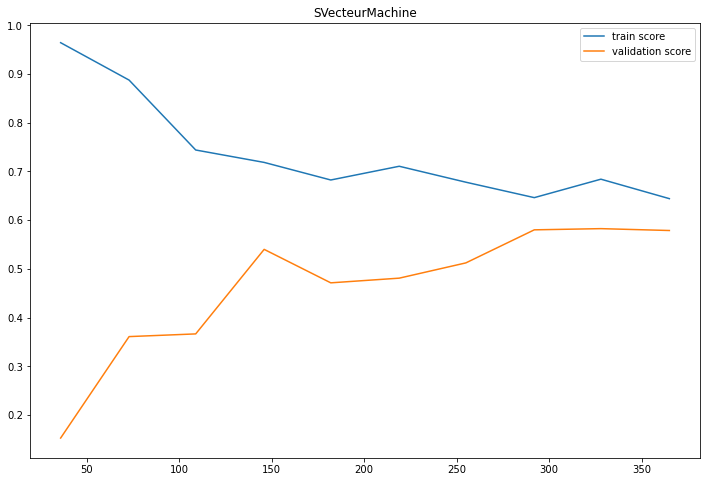

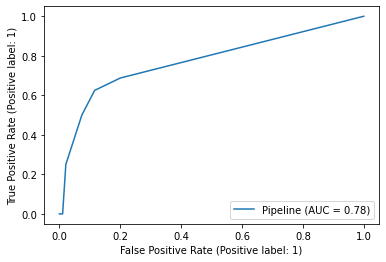

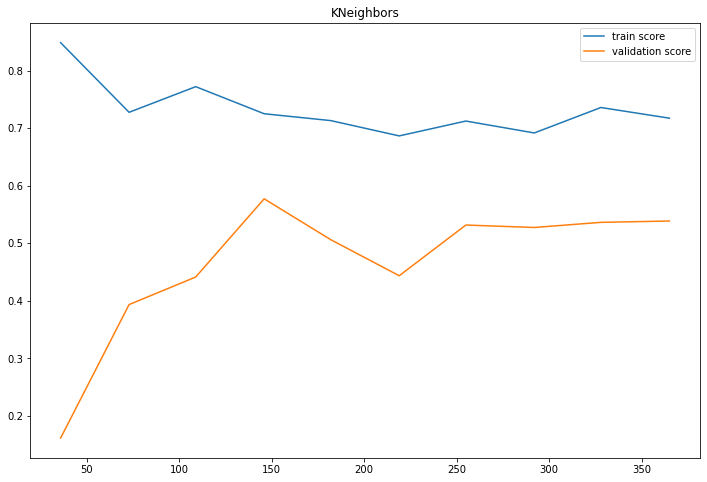

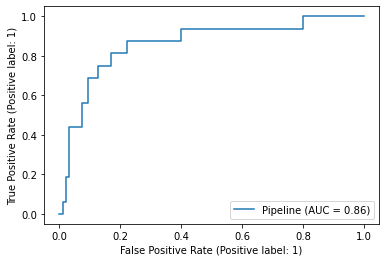

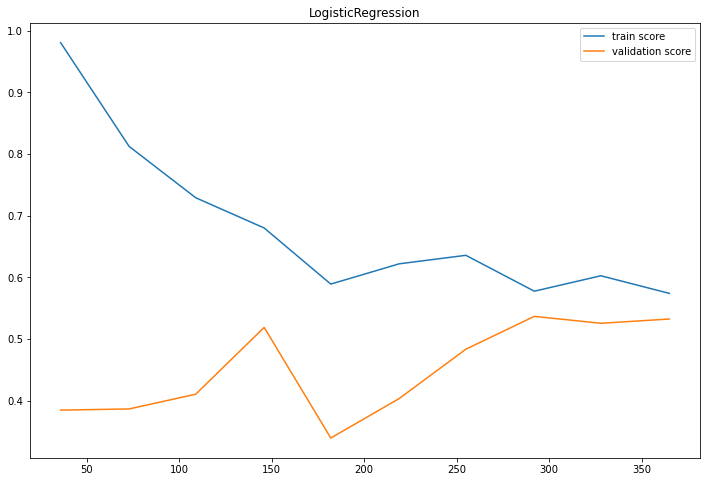

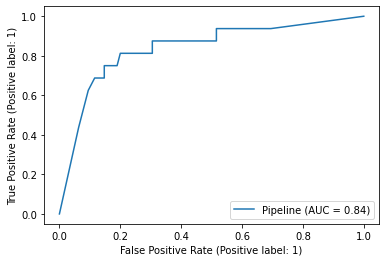

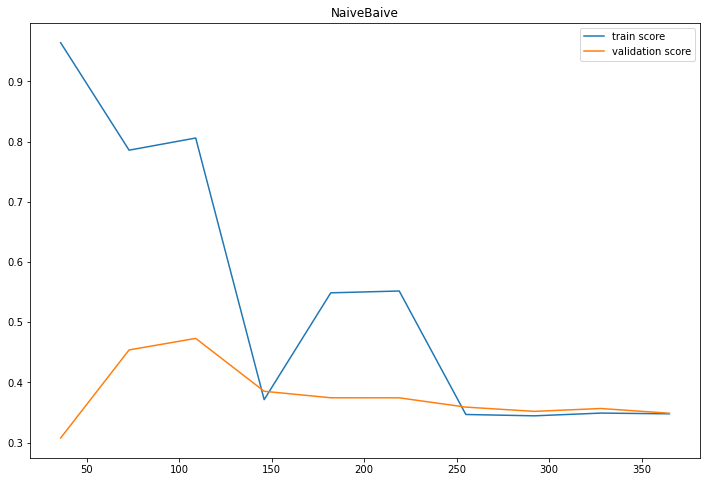

In [41]:
#        Function to find the model accuracy score, classification report;
#           parameter_dictionary: takes as an input, which is a dictionary containing the pipeline for the
#                                  individual model.
#
def model_evaluation(parameter_dictionary):
        
    for name, model in parameter_dictionary.items():
        print('-'*50)
        print(name)
        evaluation = MODEL(model,name)
    return evaluation
evaluation = model_evaluation(dict_models)

In [42]:
### OPTIMISATION DU MODELE SVM

In [52]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [65]:
hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000], 
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(45, 60)}

In [66]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=4,
                          n_iter=100)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'svc__gamma': 0.0005, 'svc__C': 1000, 'pipeline__selectkbest__k': 53, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        95
           1       0.62      0.50      0.55        16

    accuracy                           0.88       111
   macro avg       0.77      0.72      0.74       111
weighted avg       0.87      0.88      0.88       111



[[90  5]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        95
           1       0.62      0.50      0.55        16

    accuracy                           0.88       111
   macro avg       0.77      0.72      0.74       111
weighted avg       0.87      0.88      0.88       111



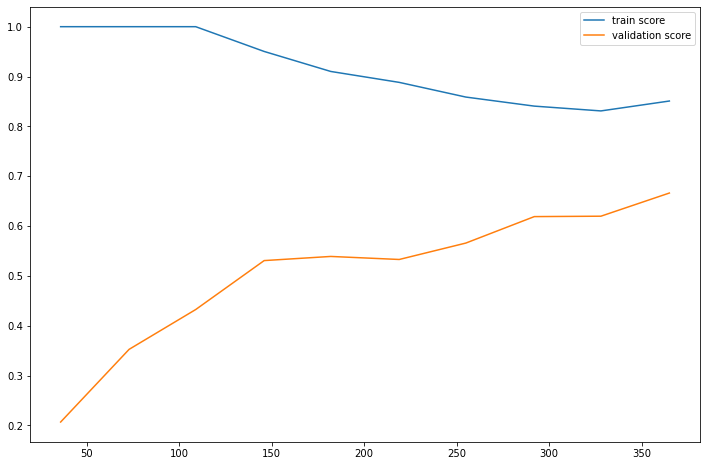

In [67]:
evaluation(grid.best_estimator_)